<a href="https://colab.research.google.com/github/Shubhamd13/NLP/blob/main/8_2_LoRA_Student_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Utility

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_weights(weights, title):
    fig, ax = plt.subplots()
    ax.imshow(weights == 0, vmin=0, vmax=1, cmap='summer')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

    # Annotate each cell with the weight value (even if 0)
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f"{weights[i, j]:.2f}", ha='center', va='center', color='black')

    # Add spacing between the cells. Adjust the value as needed.
    ax.set_xticks(np.arange(-0.5, weights.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, weights.shape[0], 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)

    plt.show()

## Step 1: Initialize a single MLP

(100, 8) (100, 10)


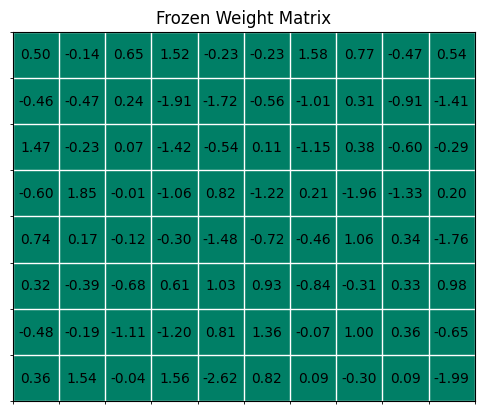

In [3]:
np.random.seed(42)

# weight matrix dimension
input_dim  = 8
output_dim = 10

# initialize MLP layer with random weights
W = np.random.randn(input_dim, output_dim)

# synthetic training data
X_train  = np.random.randn(100, input_dim)                   # input to the MLP layer: 100 samples, features = input_dim
Y_target = X_train @ (W + np.random.randn(*W.shape) * 0.05)  # output of the MLP Layer

print(X_train.shape, Y_target.shape)
plot_weights(W, "Frozen Weight Matrix")

## Step 2: LoRA setup

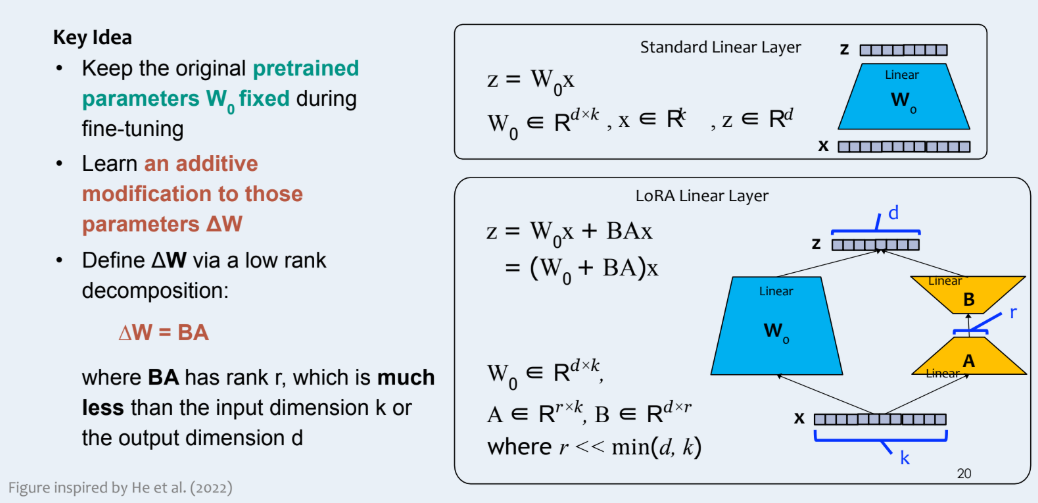

In [5]:
np.random.seed(42)

rank = 1

###<--- Write code here
A = np.random.randn(input_dim, rank)  * 0.01  # write appropriate dimensions inside np.random.randn()
###

B = np.random.randn(rank, output_dim) * 0.01  # Up projection
print(f"A shape {A.shape}")

A shape (8, 1)


## Step 3: LoRA training using Gradient Descent

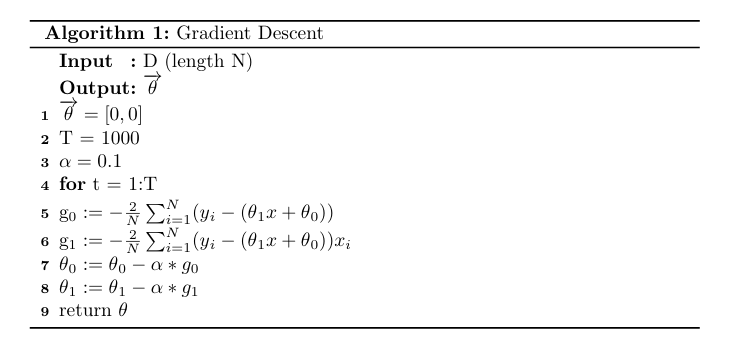

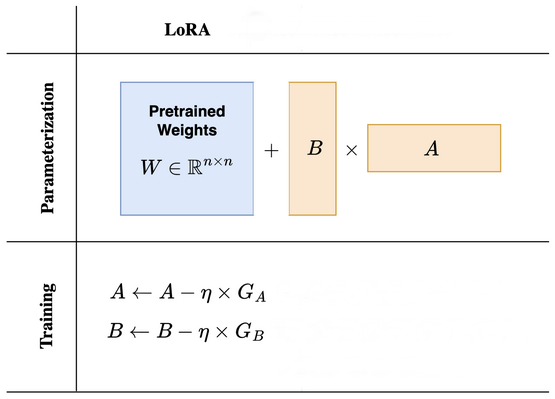

Epoch 000 | Loss: 0.0179
Epoch 020 | Loss: 0.0178
Epoch 040 | Loss: 0.0175
Epoch 060 | Loss: 0.0162
Epoch 080 | Loss: 0.0140
Epoch 100 | Loss: 0.0131
Epoch 120 | Loss: 0.0126
Epoch 140 | Loss: 0.0122
Epoch 160 | Loss: 0.0119
Epoch 180 | Loss: 0.0118
Epoch 199 | Loss: 0.0116


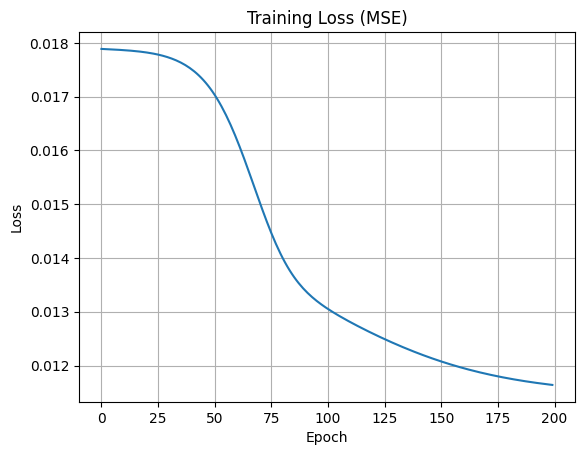

In [6]:
np.random.seed(42)

# Hyperparameters
lr = 0.1
epochs = 200

losses = []

for epoch in range(epochs):
    # Forward pass


    ###<--- Write code here
    W_lora =     W + A@B               # LoRA calculation formula: W + AB
    ###

    Y_pred = X_train @ W_lora

    # Compute loss (MSE)
    loss = np.mean((Y_pred - Y_target)**2)
    losses.append(loss)

    # Backpropagation (manual gradients)
    dY = 2 * (Y_pred - Y_target) / Y_pred.shape[0]  # Derivative of MSE

    # Gradients for A and B
    dA = X_train.T @ dY @ B.T
    dB = A.T @ X_train.T @ dY

    # Gradient descent updates
    A -= lr * dA

    ###<--- Write code here
    B -=   lr * dB                    # perform gradient update on B
    ###

    if epoch % 20 == 0 or epoch == epochs-1:
        print(f"Epoch {epoch:03d} | Loss: {loss:.4f}")

# Loss Visualization
plt.plot(losses)
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Step 4: Visualization

In [7]:
# Compute adapted weight
W_adapter = A @ B
W_lora = W + W_adapter

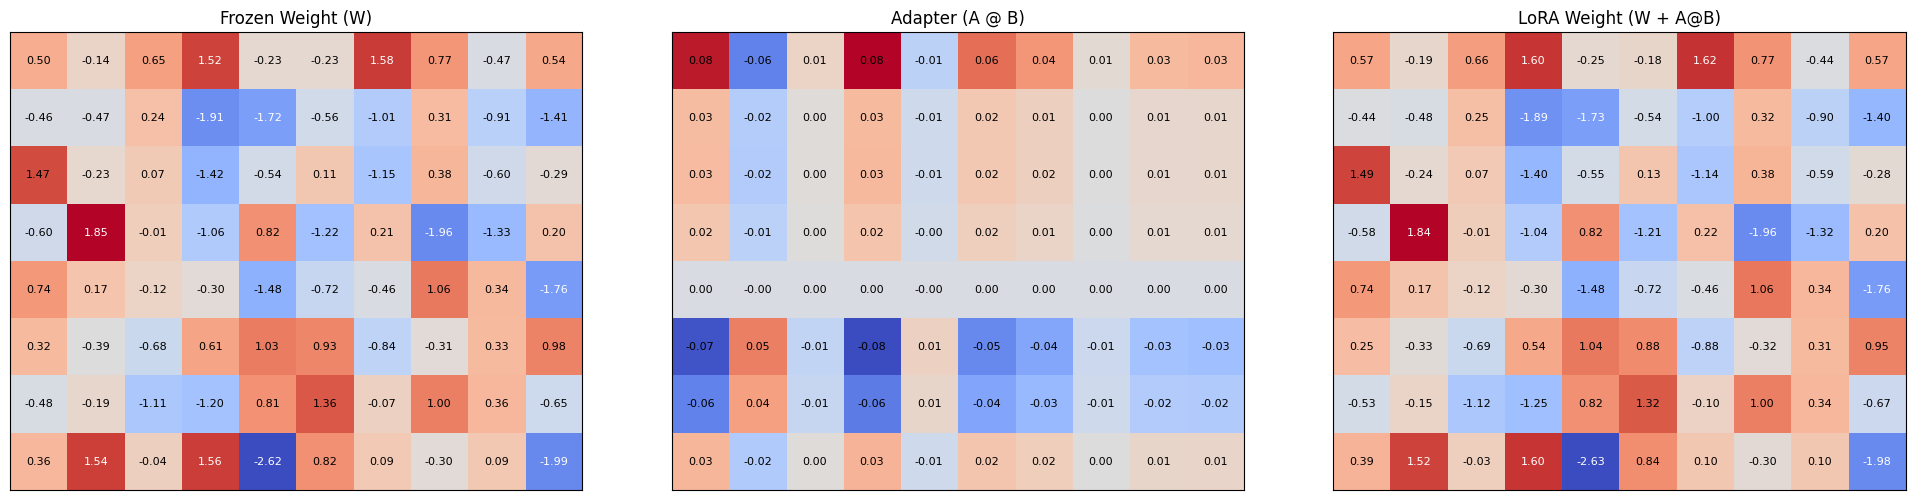

In [8]:
matrices = [W, W_adapter, W_lora]
titles = ["Frozen Weight (W)", "Adapter (A @ B)", "LoRA Weight (W + A@B)"]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, (matrix, title) in enumerate(zip(matrices, titles)):
    ax = axes[idx]
    im = ax.imshow(matrix, cmap='coolwarm')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

    # Annotate each cell with numeric value
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, f"{matrix[i, j]:.2f}",
                    ha='center', va='center',
                    color='black' if abs(matrix[i, j]) < 1.5 else 'white', fontsize=8)
plt.tight_layout()
plt.show()

## Step 5: Performance Comparison

Mean Sqaured Error (Frozen W): 0.017891746744367422
Mean Sqaured Error (LoRA Adapted): 0.011634039645184899


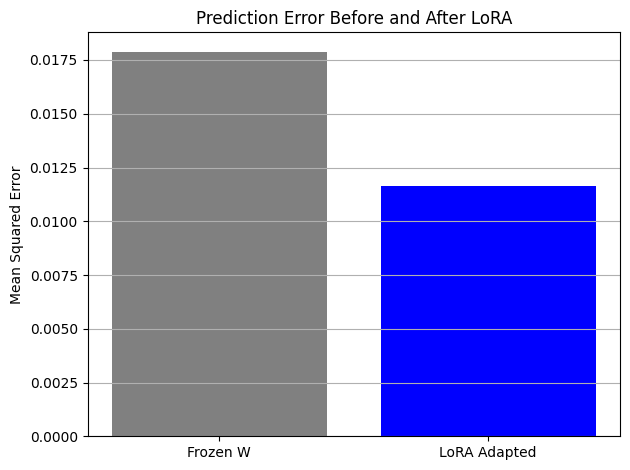

In [9]:
Y_frozen = X_train @ W


###<--- Write code here
Y_adapted = X_train @ (W + A @ B)               # calculate prediction using LoRA adapted weight matrix
###

error_frozen = np.mean((Y_target - Y_frozen)**2)
error_lora = np.mean((Y_target - Y_adapted)**2)

print("Mean Sqaured Error (Frozen W):", np.mean(error_frozen))
print("Mean Sqaured Error (LoRA Adapted):", np.mean(error_lora))

plt.bar(['Frozen W', 'LoRA Adapted'], [error_frozen, error_lora], color=['gray', 'blue'])
plt.ylabel("Mean Squared Error")
plt.title("Prediction Error Before and After LoRA")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

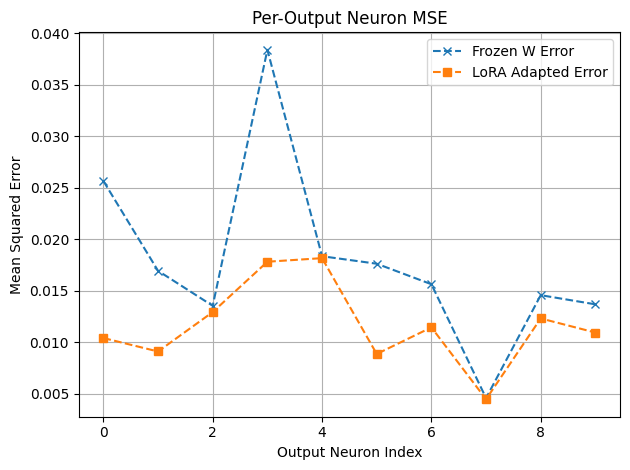

In [10]:
errors_frozen = ((Y_target - Y_frozen) ** 2).mean(axis=0)
errors_adapted = ((Y_target - Y_adapted) ** 2).mean(axis=0)

plt.plot(errors_frozen, 'x--', label="Frozen W Error")
plt.plot(errors_adapted, 's--', label="LoRA Adapted Error")
plt.title("Per-Output Neuron MSE")
plt.xlabel("Output Neuron Index")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()